<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [4]:
path="/Users/mac/Desktop/Final_Project-/Module 3 ExploratoryDataAnalysis/m2_survey_data.csv"

In [5]:
df=pd.read_csv(path)

In [7]:
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult


In [10]:
#Check for null values in our annual salary 
df["ConvertedComp"].isna().sum()

816

In [11]:
#filling up the missing values with mean of ConvertedComp as salaries_mean
salaries_mean=df["ConvertedComp"].median()

In [12]:
df["ConvertedComp"].replace(np.nan,salaries_mean,inplace=True)

In [13]:
#Plot the distribution curve for the column `ConvertedComp`.
salaries_value=df["ConvertedComp"]

In [16]:
#check for null value after impute
df["ConvertedComp"].isna().sum()

0

In [32]:
# your code goes here
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [14]:
#salraies in 50 weeks of work 50 bins 
density=np.histogram(salaries_value,bins=50,density=True)


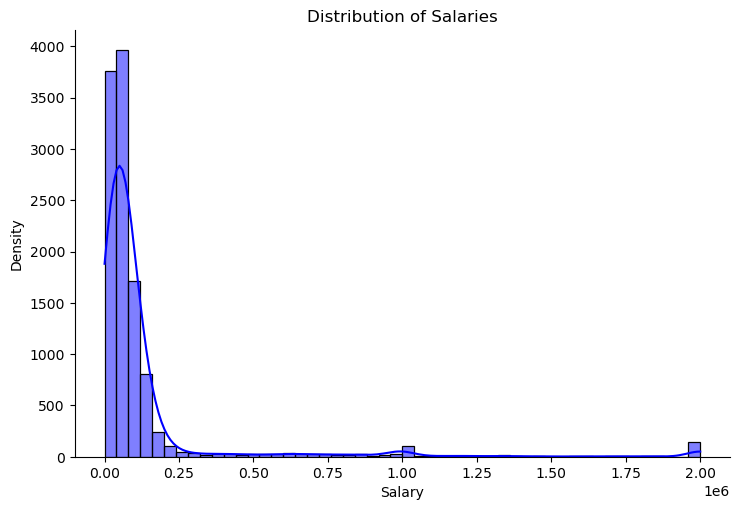

In [18]:
sns.displot(salaries_value, kde=True, bins=50, color='blue', aspect=1.5)
            #kde_kws={'color': 'red', 'lw': 2}#)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.savefig("Salary_distribution")
plt.show()
plt.close()

Plot the histogram for the column `ConvertedComp`.


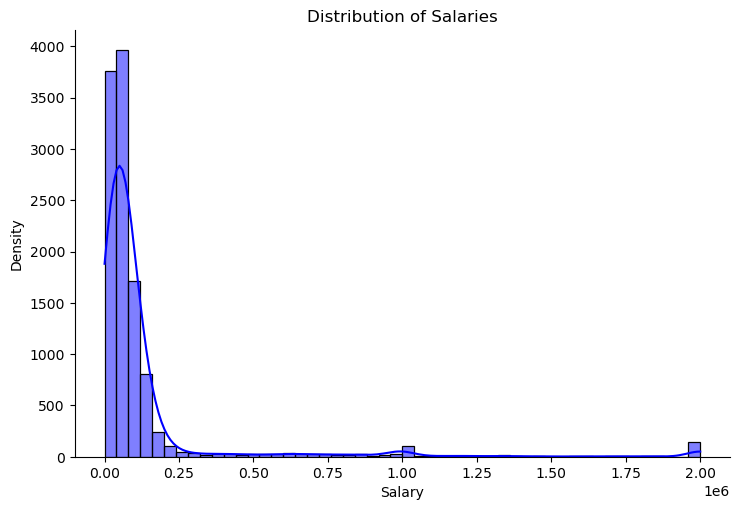

In [19]:
# your code goes here
sns.displot(salaries_value, kde=True, bins=50, color='blue', aspect=1.5)
            #kde_kws={'color': 'red', 'lw': 2}#)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

What is the median of the column `ConvertedComp`?


Text(0, 0.5, 'Frequency')

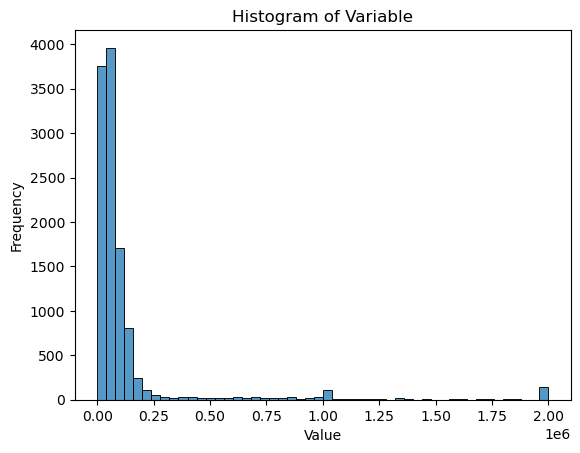

In [20]:
# your code goes here
sns.histplot(salaries_value, bins=50, kde=False)

# Add titles and labels
plt.title('Histogram of Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')

How many responders identified themselves only as a **Man**?


In [23]:
# your code goes here
df.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


In [21]:
df["Gender"].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [22]:
#count How many man contributed on the survery
count_man=(df["Gender"]=="Man").sum()

In [23]:
count_man

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [24]:
# your code goes here filter the data to include women gender only
data_women= df[df["Gender"] == "Woman"]

In [25]:
median_women=data_women['ConvertedComp'].median()

In [26]:
median_women

57745.0

In [27]:
data_women['ConvertedComp'].mean()

98018.7633378933

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [28]:
# your code goes here
description = df['Age'].describe()


In [29]:
description

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [37]:
#find the five number istatistic 
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()


In [38]:
print(f"Minimum Age: {min_age}")
print(f"First Quartile (Q1): {q1_age}")
print(f"Median (Q2): {median_age}")
print(f"Third Quartile (Q3): {q3_age}")
print(f"Maximum Age: {max_age}")

Minimum Age: 16.0
First Quartile (Q1): 25.0
Median (Q2): 29.0
Third Quartile (Q3): 35.0
Maximum Age: 99.0


In [39]:
df["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11398 entries, 0 to 11397
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
11111 non-null  float64
dtypes: float64(1)
memory usage: 89.2 KB


Plot a histogram of the column `Age`.


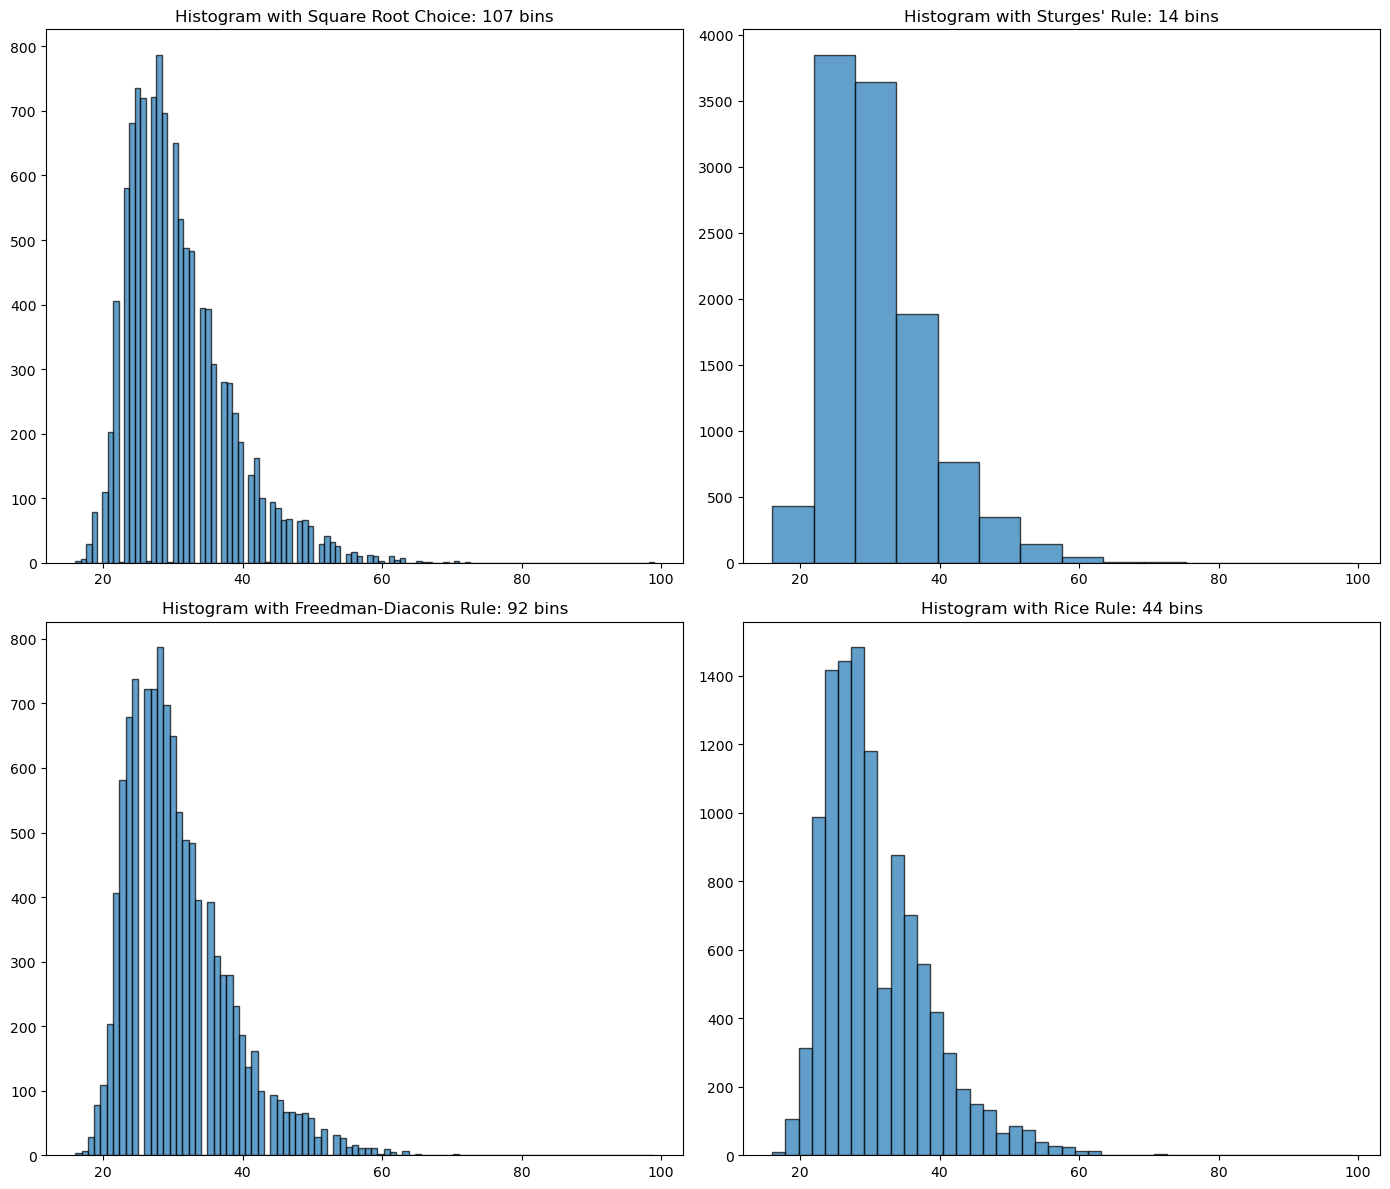

In [30]:
# your code goes here
# Plot histograms with different bin choices
plt.figure(figsize=(14, 12))

# Square Root Choice
plt.subplot(2, 2, 1)
plt.hist(df['Age'], bins=107, edgecolor='black', alpha=0.7)
plt.title('Histogram with Square Root Choice: 107 bins')

# Sturges' Rule
plt.subplot(2, 2, 2)
plt.hist(df['Age'], bins=14, edgecolor='black', alpha=0.7)
plt.title('Histogram with Sturges\' Rule: 14 bins')

# Freedman-Diaconis Rule
plt.subplot(2, 2, 3)
plt.hist(df['Age'], bins=92, edgecolor='black', alpha=0.7)
plt.title('Histogram with Freedman-Diaconis Rule: 92 bins')

# Rice Rule
plt.subplot(2, 2, 4)
plt.hist(df['Age'], bins=44, edgecolor='black', alpha=0.7)
plt.title('Histogram with Rice Rule: 44 bins')

plt.tight_layout()
plt.show()

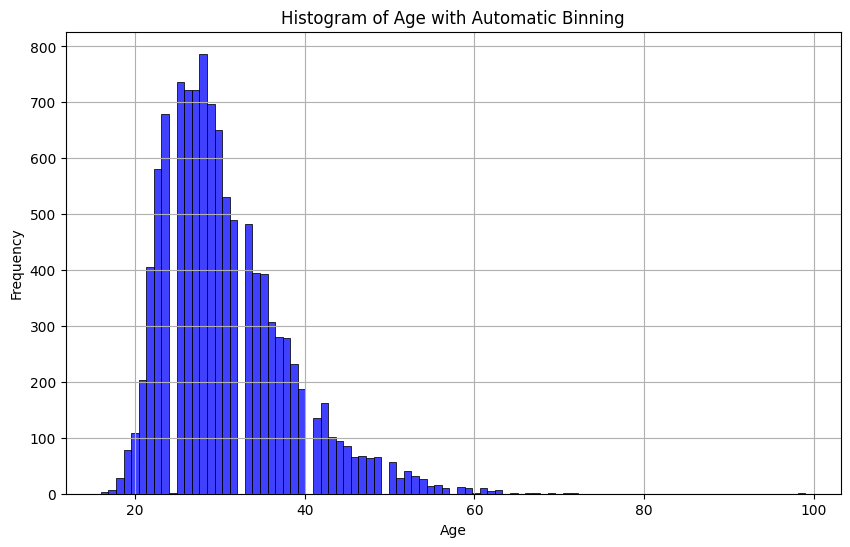

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins='auto', kde=False, color='blue')
plt.title('Histogram of Age with Automatic Binning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

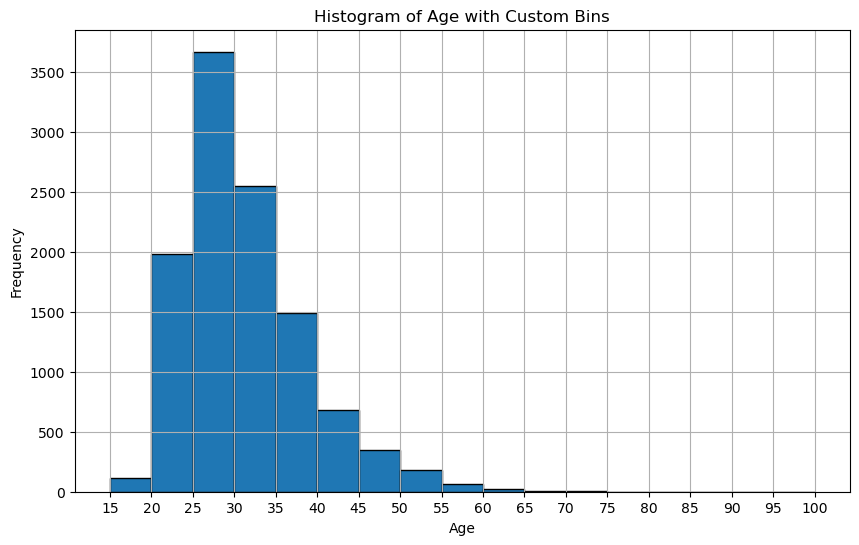

In [38]:
# Define custom bin edges
bin_edges = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=bin_edges, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with Custom Bins')
plt.xticks(bin_edges)  # Set x-ticks to match bin edges
plt.grid(True)
plt.savefig("Respondents Age Distribution.png")
plt.show()
plt.close()


In [39]:
#what is the median of Converted com

In [194]:
df["ConvertedComp"].median()

57745.0

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


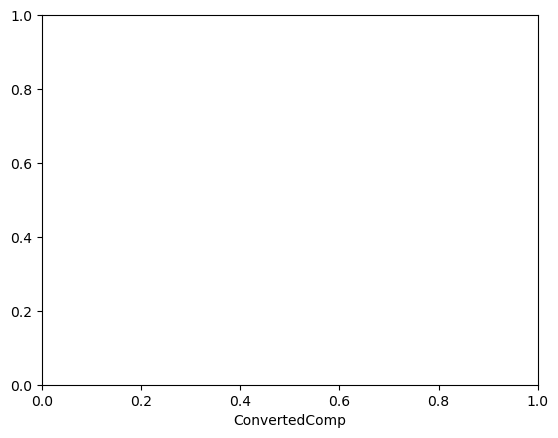

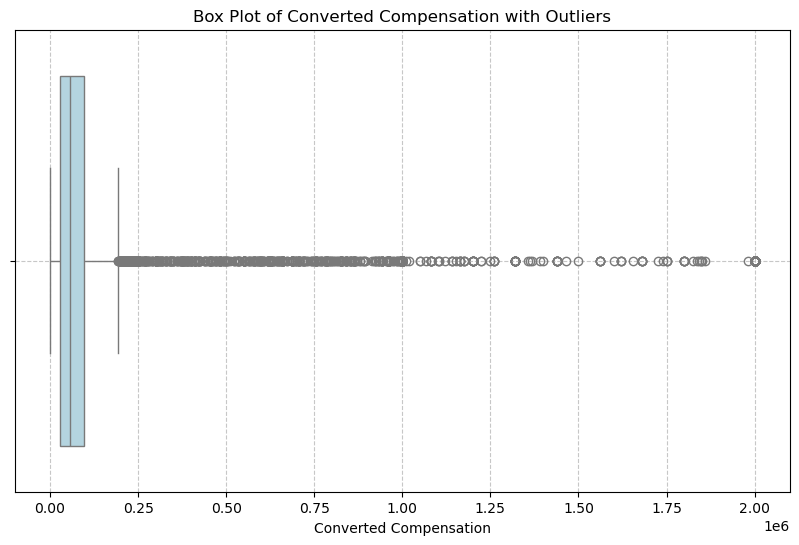

In [57]:
# your code goes here Find out if outliers exist in the column ConvertedComp using a box plot?
plt.xlabel('ConvertedComp')
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'], color='lightblue')
# Set the title and labels
plt.title('Box Plot of Converted Compensation with Outliers')
plt.xlabel('Converted Compensation')
# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
# Save the figure
plt.savefig('box_plot_converted_compensation_withoutlier', dpi=300, bbox_inches='tight')
plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [55]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)


In [56]:
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

In [57]:
# your code goes here
# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [168]:
lower_bound

-69960.0

In [169]:
upper_bound

193976.0

In [178]:
# Print quartiles and bounds for verification
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Q1: 29016.0
Q3: 95000.0
IQR: 65984.0
Lower Bound: -69960.0
Upper Bound: 193976.0


Identify how many outliers are there in the `ConvertedComp` column.


In [58]:
# your code goes here
# Identify outliers
df_outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]


In [180]:
df_no_outlier.shape[0]

10465

In [59]:
# your code goes here creating condition mask to apply to df 
mask = (df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)

In [61]:
df_no_outlier = df[mask]

In [66]:
df_no_outlier["ConvertedComp"].mean()

59883.20838915799

In [48]:
df_no_outlier["ConvertedComp"].median()

57287.0

In [82]:
average_salary_women = df_no_outlier[df_no_outlier['Gender'] == "Woman"]["CompTotal"].mean()

In [84]:
average_salary_man = df_no_outlier[df_no_outlier['Gender'] == "Man"]["CompTotal"].mean()

In [85]:
average_salary_man

744883.9337830242

In [83]:
average_salary_women

576924.1323987539

In [81]:
df_no_outlier.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


In [49]:
#import scipy
#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(df['ConvertedComp']))
# Define a threshold for identifying outliers
#threshold = 3.0  # Common threshold value

# Create a mask for rows that are not outliers
#mask = z <= threshold

In [52]:
#print("\nNumber of rows before removing outliers:", df.shape[0])
#print("Number of rows after removing outliers:", df_no_outlier.shape[0])


Number of rows before removing outliers: 11398
Number of rows after removing outliers: 10465


In [ ]:
#Create arrays of Boolean values indicating the outlier rows
#upper_array = np.where(dff['ConvertedComp'] >= upper_bound)[0]
#lower_array = np.where(dff['ConvertedComp'] <= lower_bound)[0]
 
# Removing the outliers
#dff.drop(index=upper_array, inplace=True)
#dff.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
#print("New Shape: ", dff.shape)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here creating condition mask to apply to df 
#mask = (df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)


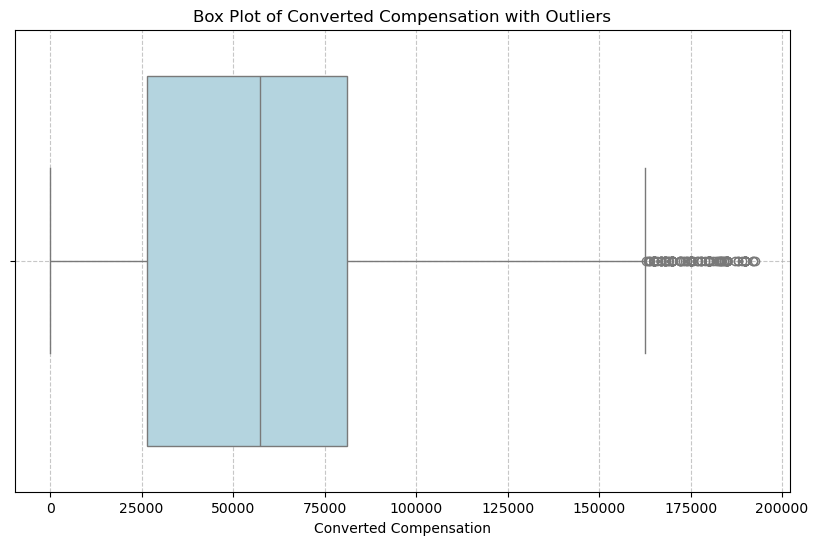

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outlier['ConvertedComp'], color='lightblue')
# Set the title and labels
plt.title('Box Plot of Converted Compensation with Outliers')
plt.xlabel('Converted Compensation')
#Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
# Save the figure
plt.savefig('box_plot_converted_compensation_removedoutlier.png')

# Display the plot
plt.show()

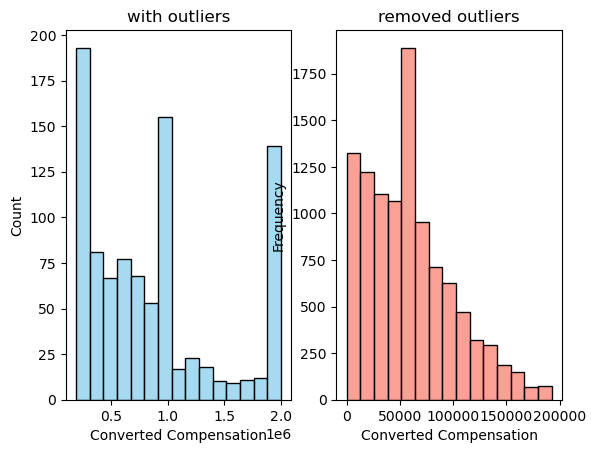

In [62]:
# Plot histogram for the first dataset
plt.subplot(1, 2, 1)
sns.histplot(df_outliers['ConvertedComp'], bins=15, color='skyblue', kde=False)
plt.title('with outliers')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')

# Plot histogram for the second dataset
plt.subplot(1, 2, 2)
sns.histplot(df_no_outlier['ConvertedComp'], bins=15, color='salmon', kde=False)
plt.title('removed outliers')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
# Save the figure
plt.savefig('histogram_comparison.png')

# Display the plots
plt.show()

In [10]:
df_better_life = df[['Gender', 'BetterLife', 'WorkLoc']]

In [11]:
df_better_life.head()

,Gender,BetterLife,WorkLoc
0,Man,Yes,Home
1,Man,No,Office
2,Man,Yes,Home
3,Man,No,Home
4,Man,Yes,"Other place, such as a coworking space or cafe"


In [21]:
#lets modify workplace value 
shorten_workloc = {
    'Other place, such as a coworking space or cafe': 'Coworking/Cafe'
}

# Step 2: Replace long values with short ones
df['WorkLoc'] = df['WorkLoc'].replace(shorten_workloc)

In [22]:
#Does Location matter 
df_better_life = df[df['BetterLife'] == 'Yes']
workloc_counts = df_better_life['WorkLoc'].value_counts()
# Step 3: Print the results
print(workloc_counts)


WorkLoc
Office            4380
Home              2266
Coworking/Cafe     589
Name: count, dtype: int64


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#lets Take propotion of office 

In [37]:
# Step 2: Count "Yes" responses per WorkLoc
yes_counts = df[df['BetterLife'] == 'Yes']['WorkLoc'].value_counts()

# Step 3: Count "No" responses per WorkLoc
no_counts = df[df['BetterLife'] == 'No']['WorkLoc'].value_counts()

# Step 4: Calculate the proportions
yes_proportions = yes_counts / total_counts
no_proportions = no_counts / total_counts

# Step 5: Convert proportions Series to DataFrames for plotting
yes_proportions_df = yes_proportions.reset_index()
yes_proportions_df.columns = ['WorkLoc', 'Proportion']

no_proportions_df = no_proportions.reset_index()
no_proportions_df.columns = ['WorkLoc', 'Proportion']

# Create subplots for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Proportion of "Yes" responses
sns.barplot(x='WorkLoc', y='Proportion', data=yes_proportions_df, ax=axs[0])
axs[0].set_title('"Yes" Better Life Responses by Work Location')
axs[0].set_xlabel('Work Location')
axs[0].set_ylabel('Proportion')
axs[0].tick_params(axis='x', rotation=45)

# Plot 2: Proportion of "No" responses
sns.barplot(x='WorkLoc', y='Proportion', data=no_proportions_df, ax=axs[1])
axs[1].set_title('"No" Better Life Responses by Work Location')
axs[1].set_xlabel('Work Location')
axs[1].set_ylabel('Proportion')
axs[1].tick_params(axis='x', rotation=45)
plt.savefig('better_life_work_location_comparison.png')
plt.close()

In [48]:
df["EdLevel"].dropna(inplace=True)

In [50]:
df["ConvertedComp"].isnull().sum()

816

In [51]:
df["ConvertedComp"].dropna(inplace=True)

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000., 2250000.]),
 [Text(-250000.0, 0, '−0.25'),
  Text(0.0, 0, '0.00'),
  Text(250000.0, 0, '0.25'),
  Text(500000.0, 0, '0.50'),
  Text(750000.0, 0, '0.75'),
  Text(1000000.0, 0, '1.00'),
  Text(1250000.0, 0, '1.25'),
  Text(1500000.0, 0, '1.50'),
  Text(1750000.0, 0, '1.75'),
  Text(2000000.0, 0, '2.00'),
  Text(2250000.0, 0, '2.25')])

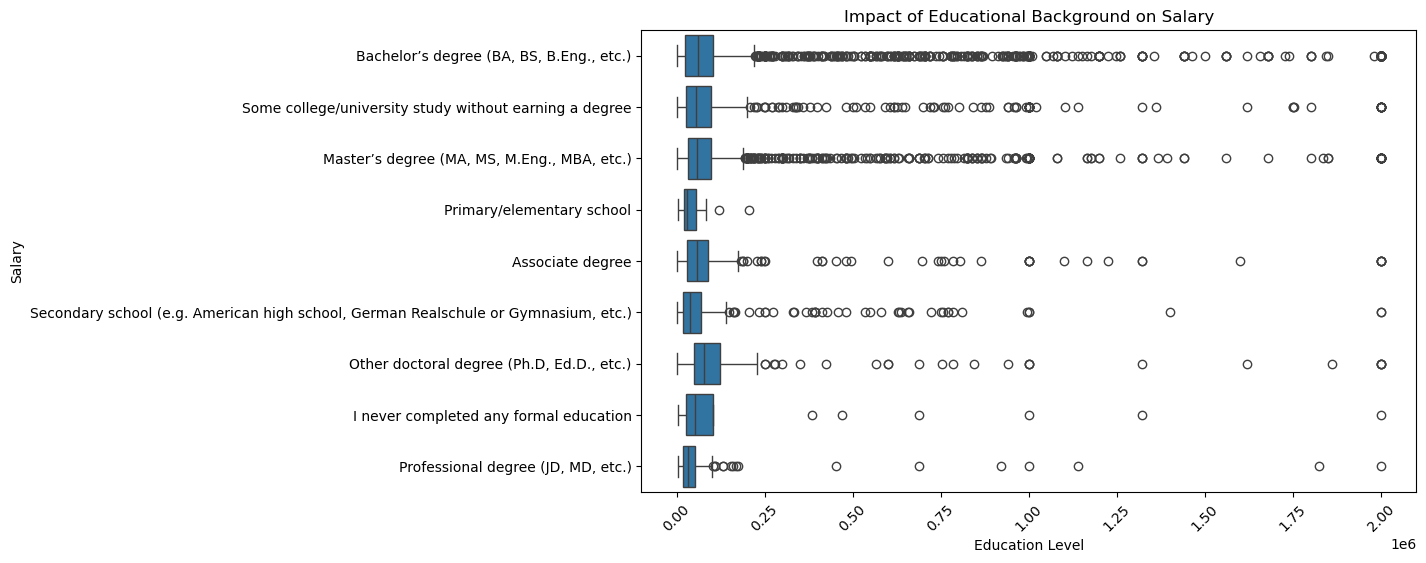

In [53]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ConvertedComp', y='EdLevel', data=df)
plt.title('Impact of Educational Background on Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)



## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [63]:
# your code goes here
#filter data with numerical column only
# Exclude non-numeric columns
df_numeric = df.select_dtypes(include='number')



In [64]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Extract correlations with 'Age'
age_correlation = correlation_matrix['Age']

In [65]:
age_correlation

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.103232
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

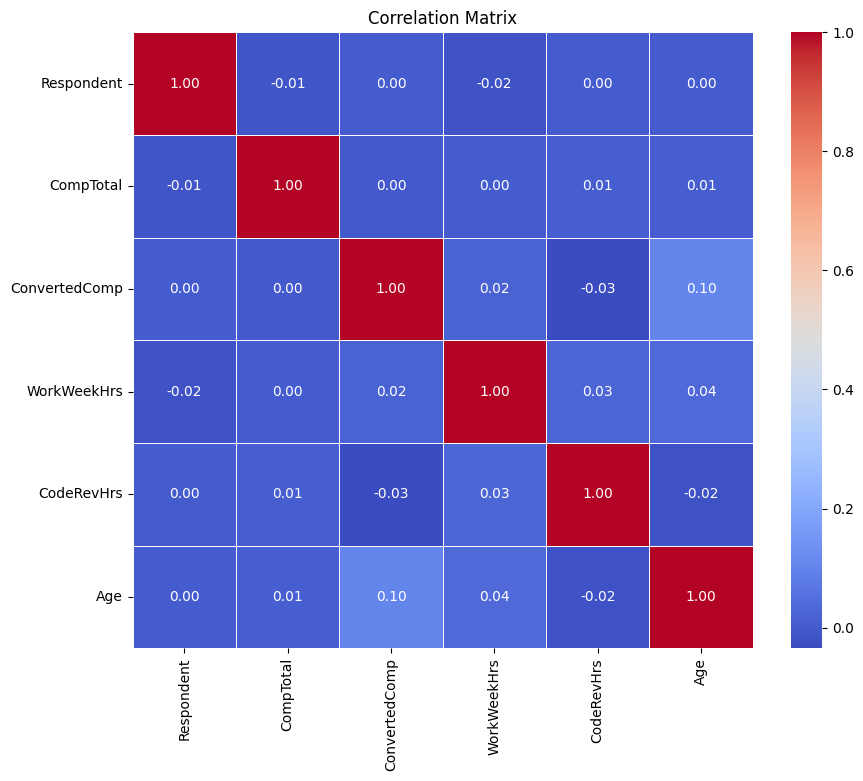

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [188]:
# Based on the boxplot of ‘Age’ how many outliers do you see below Q1?
age_plot=df["Age"]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffaaaf9fca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffaaafa3550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffaaaf9f8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffaaafa3ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffaaafb51c0>],
 'means': []}

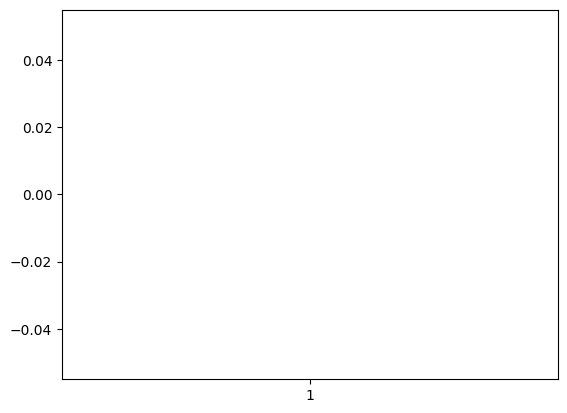

In [191]:
plt.boxplot(data=df, x='Age')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffaa7264820>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffaa7264d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffaa72646a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffaa72682e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffaa7268970>],
 'means': []}

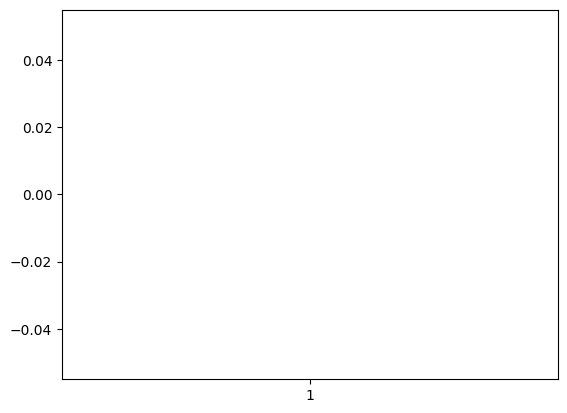

In [190]:
plt.boxplot(age_plot)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
